In [24]:
import time
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
from warnings import filterwarnings
filterwarnings("ignore")

2x1-x2-x3=1   
3x1-4x2+x3=2  
x1-x2-x3=3   

2x1-x2-x3-1=0  
3x1-4x2+x3-2=0  
x1-x2-x3-3=0  

x1 = 3x1-x2-x3-1  
x2 = 3x1-3x2+x3-2  
x3 = x1-x2-3  

3*x1-1*x2-1*x3-1 = 0 - 0 -0 - 1 = -1     
3*x1-3*x2+1*x3-2 = 0 - 0 + 0 -2 = -2     
1*x1-1*x2-3 = 0 -0 -3 =           -3    

-4.64*x1 + 1.13*x2 -8.88*x3 + 3.75 = 0   
7.61*x1 + 6.25*x2 - 2.32*x3 - 2.33 = 0   
-9.11*x1 +1.02*x2 - 0.73*x3 + 1.2 = 0   

-3.64*x1 + 1.13*x2 -8.88*x3 + 3.75 = x1   
7.61*x1 + 7.25*x2 - 2.32*x3 - 2.33 = x2   
-9.11*x1 +1.02*x2 + 0.27*x3 + 1.2 = x3   

In [13]:
eps = 1e-2

A = np.array([
    [-4.64, 1.13, -8.88],
    [7.61, 6.25, -2.32],
    [-9.11, 1.02, -0.73],
])
     
B = np.array([
    -3.75,
    2.33,
    -1.25,
])

In [14]:
def predominance_of_diagonal_elements(A: NDArray) -> bool:
    row1_ok = abs(A[0][0]) >= abs(A[0][1]) + abs(A[0][2])
    row2_ok = abs(A[1][1]) >= abs(A[1][0]) + abs(A[1][2])
    row3_ok = abs(A[2][2]) >= abs(A[2][0]) + abs(A[2][1])
    result = row1_ok and row2_ok and row3_ok
    if not result:
        print("Сходимость не гарантированна!")
    return result
    
predominance_of_diagonal_elements(A)

Сходимость не гарантированна!


np.False_

In [15]:
def sorting_by_the_predominance_of_diagonal(A: NDArray) -> NDArray:
    x1_max, x2_max, x3_max = None, None, None
    for i_id, i in enumerate(np.abs(A.T)):
        if i_id == 0:
            x1_max = A[np.argmax(i)]
        if i_id == 1:
            x2_max = A[np.argmax(i)]
        if i_id == 2:
            x3_max = A[np.argmax(i)]
    return np.array([x1_max, x2_max, x3_max])

sorting_by_the_predominance_of_diagonal(A)

array([[-9.11,  1.02, -0.73],
       [ 7.61,  6.25, -2.32],
       [-4.64,  1.13, -8.88]])

In [16]:
errors = {}
solutions_history: dict[str, list[float]] = {'x0': [], 'x1': [], 'x2': []}

def iteration_method(A: np.ndarray, B: np.ndarray, eps=1e-6):
    global errors, solutions_history
    
    errors = {}
    solutions_history = {'x0': [], 'x1': [], 'x2': []}
    
    if not predominance_of_diagonal_elements(A):
        A = sorting_by_the_predominance_of_diagonal(A)
    
    x_old = np.zeros(len(B))
    error = np.inf
    count = 0
    
    while error > eps:
        x_new = np.zeros(len(B))
        
        # вычисляем новые значения для каждой переменной
        for i in range(len(A)):
            sum_other = 0
            for j in range(len(A)):
                if i != j:
                    sum_other += A[i][j] * x_old[j]
            
            x_new[i] = (B[i] - sum_other) / A[i][i]
        
        # вычисляем ошибку 
        error = np.max(np.abs(x_new - x_old))
        
        errors[count] = error
        solutions_history['x0'].append(x_new[0])
        solutions_history['x1'].append(x_new[1])
        solutions_history['x2'].append(x_new[2])
        
        x_old = x_new.copy()
        
        print(f"Итерация {count}: x0={x_new[0]:.6f}, x1={x_new[1]:.6f}, x2={x_new[2]:.6f}, error={error:.6e}")
        count += 1
            
    return x_old

Сходимость не гарантированна!
Итерация 0: x0=0.411636, x1=0.372800, x2=0.140766, error=4.116356e-01
Итерация 1: x0=0.442096, x1=-0.076155, x2=-0.026883, error=4.489552e-01
Итерация 2: x0=0.405263, x1=-0.175476, x2=-0.099930, error=9.932034e-02
Итерация 3: x0=0.399996, x1=-0.157742, x2=-0.093323, error=1.773306e-02
Итерация 4: x0=0.401452, x1=-0.148877, x2=-0.088314, error=8.865792e-03

Результат: x0=0.401452, x1=-0.148877, x2=-0.088314
Количество итераций: 5
Финальная ошибка: 8.87e-03


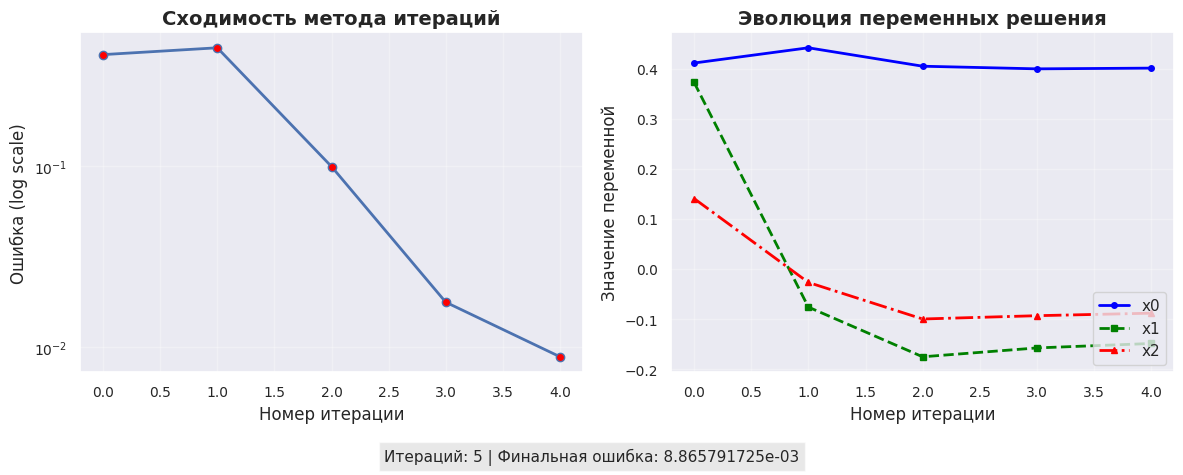

In [17]:
def plot_convergence_analysis():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # график ошибки по итерациям (логарифмическая шкала)
    iterations = list(errors.keys())
    error_values = list(errors.values())
    
    ax1.semilogy(iterations, error_values, 'b-o', linewidth=2, markersize=6, markerfacecolor='red')
    ax1.set_xlabel('Номер итерации', fontsize=12)
    ax1.set_ylabel('Ошибка (log scale)', fontsize=12)
    ax1.set_title('Сходимость метода итераций', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    
    # график изменения переменных
    colors = ['blue', 'green', 'red']
    line_styles = ['-', '--', '-.']
    
    for i, (var_name, values) in enumerate(solutions_history.items()):
        ax2.plot(range(len(values)), values, 
                color=colors[i], 
                linestyle=line_styles[i], 
                linewidth=2, 
                marker='o' if i == 0 else 's' if i == 1 else '^',
                markersize=4,
                label=var_name)
    
    ax2.set_xlabel('Номер итерации', fontsize=12)
    ax2.set_ylabel('Значение переменной', fontsize=12)
    ax2.set_title('Эволюция переменных решения', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11, loc='lower right')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    if error_values:
        final_error = error_values[-1]
        convergence_rate = error_values[-1] / error_values[-2] if len(error_values) > 1 else 0
        plt.figtext(0.5, 0.01, 
                   f"Итераций: {len(errors)} | Финальная ошибка: {final_error:.9e}", 
                   ha='center', fontsize=11, bbox=dict(facecolor='lightgray', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

solution = iteration_method(A, B, eps)
print(f"\nРезультат: x0={solution[0]:.6f}, x1={solution[1]:.6f}, x2={solution[2]:.6f}")
print(f"Количество итераций: {len(errors)}")
print(f"Финальная ошибка: {list(errors.values())[-1]:.2e}")
plot_convergence_analysis()

In [ ]:
errors_seidel = {}
solutions_history_seidel: dict[str, list[float]] = {'x0': [], 'x1': [], 'x2': []}

def seidel_method(A: np.ndarray, B: np.ndarray, eps=1e-6):
    global errors_seidel, solutions_history_seidel
    
    errors_seidel = {}
    solutions_history_seidel = {'x0': [], 'x1': [], 'x2': []}
    
    if not predominance_of_diagonal_elements(A):
        A = sorting_by_the_predominance_of_diagonal(A)
    
    x = np.zeros(len(B))
    error = np.inf
    count = 0
    
    while error > eps:
        x_old = x.copy()
        
        # ВЫЧИСЛЯЕМ НОВЫЕ ЗНАЧЕНИЯ С ИСПОЛЬЗОВАНИЕМ УЖЕ ОБНОВЛЕННЫХ ПЕРЕМЕННЫХ
        for i in range(len(A)):
            sum_before = 0  # сумма для уже обновленных переменных (j < i)
            sum_after = 0   # сумма для еще не обновленных переменных (j > i)
            
            for j in range(len(A)):
                if i != j:
                    if j < i:
                        sum_before += A[i][j] * x[j]  # используем новые значения
                    else:
                        sum_after += A[i][j] * x_old[j]  # используем старые значения
            
            x[i] = (B[i] - sum_before - sum_after) / A[i][i]
        
        error = np.max(np.abs(x - x_old))
        
        errors_seidel[count] = error
        solutions_history_seidel['x0'].append(x[0])
        solutions_history_seidel['x1'].append(x[1])
        solutions_history_seidel['x2'].append(x[2])
        
        print(f"Зейдель {count}: x0={x[0]:.6f}, x1={x[1]:.6f}, x2={x[2]:.6f}, error={error:.6e}")
        count += 1
            
    return x

МЕТОД ПРОСТОЙ ИТЕРАЦИИ
Сходимость не гарантированна!
Итерация 0: x0=0.411636, x1=0.372800, x2=0.140766, error=4.116356e-01
Итерация 1: x0=0.442096, x1=-0.076155, x2=-0.026883, error=4.489552e-01
Итерация 2: x0=0.405263, x1=-0.175476, x2=-0.099930, error=9.932034e-02
Итерация 3: x0=0.399996, x1=-0.157742, x2=-0.093323, error=1.773306e-02
Итерация 4: x0=0.401452, x1=-0.148877, x2=-0.088314, error=8.865792e-03
Итерация 5: x0=0.402043, x1=-0.148790, x2=-0.087947, error=5.913012e-04
Итерация 6: x0=0.402024, x1=-0.149374, x2=-0.088245, error=5.835927e-04
Итерация 7: x0=0.401982, x1=-0.149460, x2=-0.088309, error=8.653964e-05
Итерация 8: x0=0.401978, x1=-0.149434, x2=-0.088298, error=2.675479e-05
Итерация 9: x0=0.401980, x1=-0.149424, x2=-0.088292, error=9.514521e-06
Итерация 10: x0=0.401980, x1=-0.149425, x2=-0.088292, error=6.012848e-07
Итерация 11: x0=0.401980, x1=-0.149425, x2=-0.088293, error=6.981375e-07
Итерация 12: x0=0.401980, x1=-0.149425, x2=-0.088293, error=6.684254e-08
Итерация 1

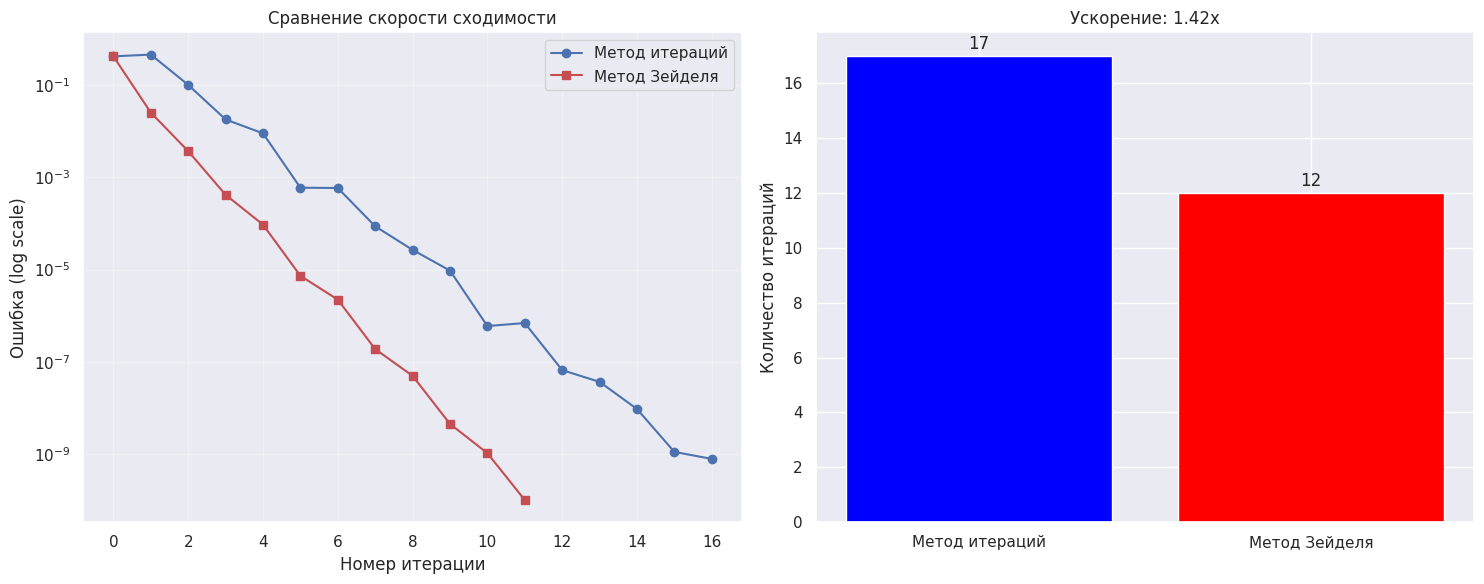

In [ ]:
def compare_methods(A, B, eps=eps):
    print("=" * 50)
    print("МЕТОД ПРОСТОЙ ИТЕРАЦИИ")
    print("=" * 50)
    result_iter = iteration_method(A, B, eps)
    
    print("\n" + "=" * 50)
    print("МЕТОД ЗЕЙДЕЛЯ")
    print("=" * 50)
    result_seidel = seidel_method(A, B, eps)
    
    # Сравнение результатов
    print("\n" + "=" * 50)
    print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
    print("=" * 50)
    print(f"Метод итераций: {result_iter}")
    print(f"Метод Зейделя:  {result_seidel}")
    print(f"Разница:        {np.abs(result_iter - result_seidel)}")
    
    # Построение графиков сравнения
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График ошибок
    ax1.semilogy(list(errors.keys()), list(errors.values()), 'b-o', 
                label='Метод итераций', markersize=6)
    ax1.semilogy(list(errors_seidel.keys()), list(errors_seidel.values()), 'r-s', 
                label='Метод Зейделя', markersize=6)
    ax1.set_xlabel('Номер итерации')
    ax1.set_ylabel('Ошибка (log scale)')
    ax1.set_title('Сравнение скорости сходимости')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # График количества итераций
    methods = ['Метод итераций', 'Метод Зейделя']
    iterations = [len(errors), len(errors_seidel)]
    speedup = iterations[0] / iterations[1]
    
    bars = ax2.bar(methods, iterations, color=['blue', 'red'])
    ax2.set_ylabel('Количество итераций')
    ax2.set_title(f'Ускорение: {speedup:.2f}x')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, iterations):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{value}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return result_iter, result_seidel


result_iter, result_seidel = compare_methods(A, B, eps)

In [ ]:
def inverse_matrix_method(A: np.ndarray, B: np.ndarray) -> np.ndarray:
        # проверяем, что матрица определитель 0
        det = np.linalg.det(A)
        if np.isclose(det, 0):
            raise ValueError("Матрица вырождена (определитель = 0), обратной матрицы не существует")
        A_inv = np.linalg.inv(A)
        
        # умножаем обратную матрицу на вектор правых частей
        x = np.dot(A_inv, B)
        
        return x

СРАВНЕНИЕ МЕТОДОВ РЕШЕНИЯ СЛАУ

1. МЕТОД ОБРАТНОЙ МАТРИЦЫ
------------------------------
Решение: [0.14422921 0.34212936 0.39047102]
Время выполнения: 0.019585 сек
Невязка: 8.88e-16

2. МЕТОД ПРОСТОЙ ИТЕРАЦИИ
------------------------------
Сходимость не гарантированна!
Итерация 0: x0=0.411636, x1=0.372800, x2=0.140766, error=4.116356e-01
Итерация 1: x0=0.442096, x1=-0.076155, x2=-0.026883, error=4.489552e-01
Итерация 2: x0=0.405263, x1=-0.175476, x2=-0.099930, error=9.932034e-02
Итерация 3: x0=0.399996, x1=-0.157742, x2=-0.093323, error=1.773306e-02
Итерация 4: x0=0.401452, x1=-0.148877, x2=-0.088314, error=8.865792e-03
Решение: [ 0.40145208 -0.1488767  -0.08831427]
Время выполнения: 0.003843 сек
Итераций: 5
Финальная ошибка: 8.87e-03

3. МЕТОД ЗЕЙДЕЛЯ
------------------------------
Сходимость не гарантированна!
Зейдель 0: x0=0.411636, x1=-0.128407, x2=-0.090663, error=4.116356e-01
Зейдель 1: x0=0.404523, x1=-0.153402, x2=-0.090128, error=2.499447e-02
Зейдель 2: x0=0.401682, x1=-0.1497

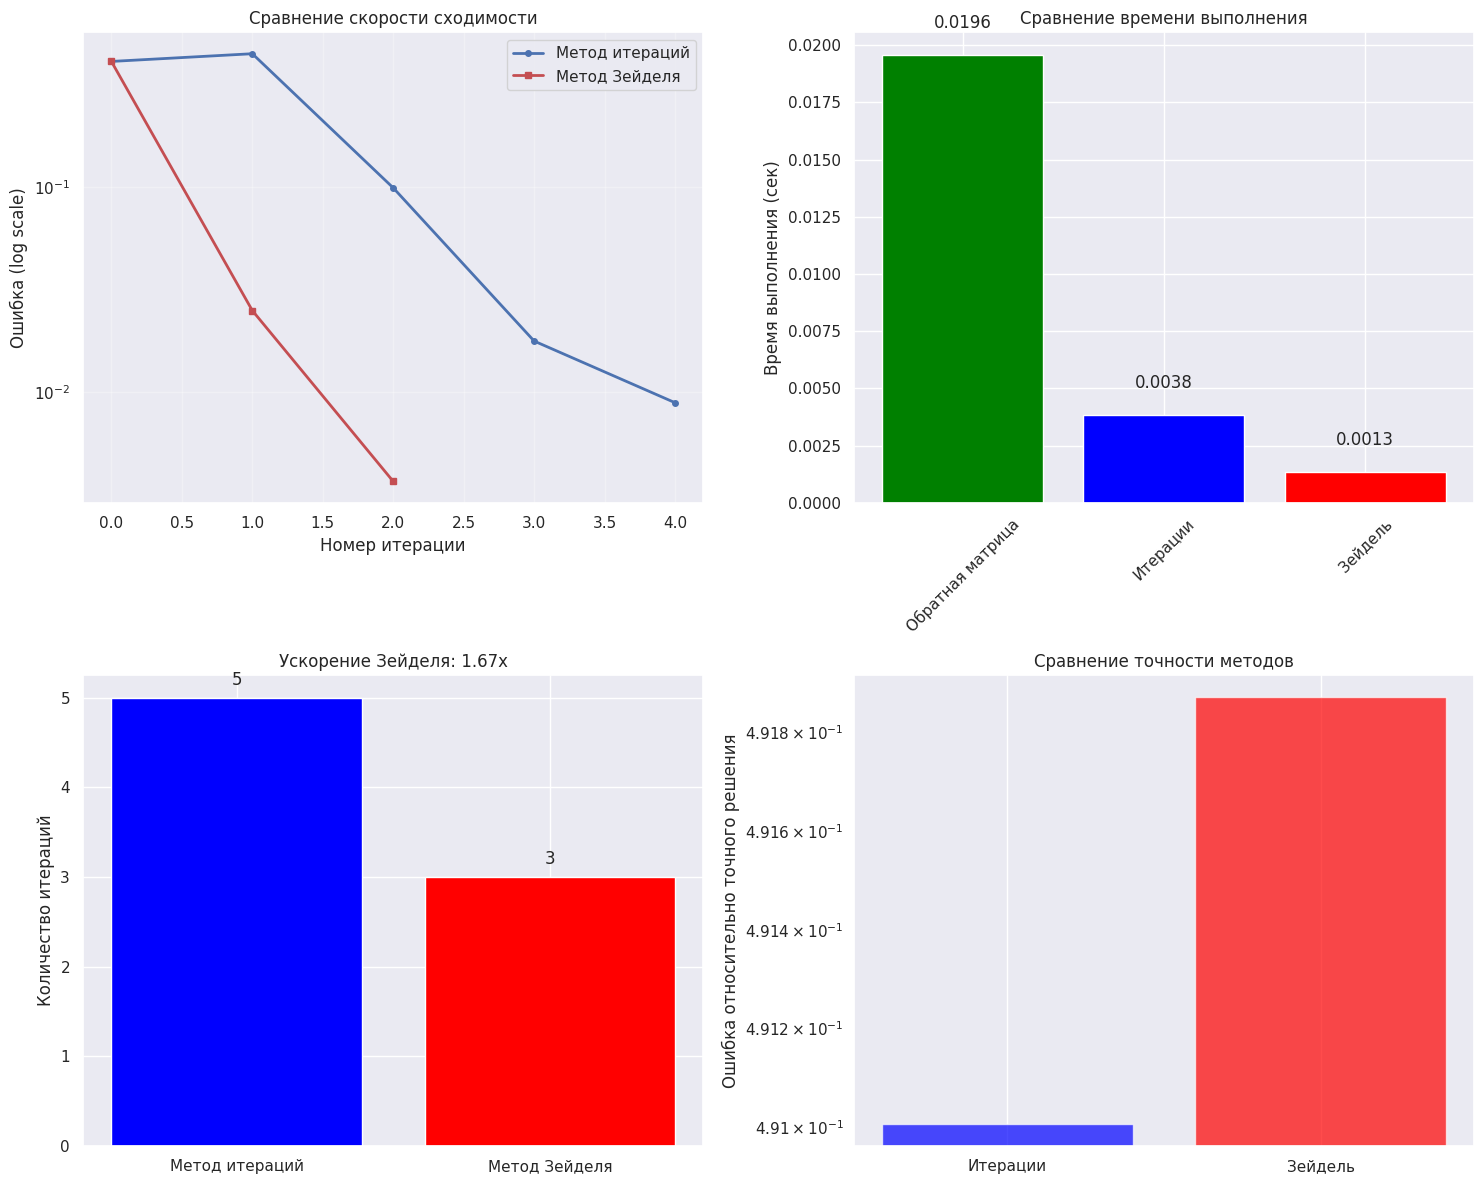

In [27]:
def compare_all_methods(A, B, eps=1e-6):
    print("=" * 60)
    print("СРАВНЕНИЕ МЕТОДОВ РЕШЕНИЯ СЛАУ")
    print("=" * 60)
    
    print("\n1. МЕТОД ОБРАТНОЙ МАТРИЦЫ")
    print("-" * 30)
    start_time = time.time()
    x_inv = inverse_matrix_method(A, B)
    inv_time = time.time() - start_time
    
    if x_inv is not None:
        print(f"Решение: {x_inv}")
        print(f"Время выполнения: {inv_time:.6f} сек")
        print(f"Невязка: {np.max(np.abs(np.dot(A, x_inv) - B)):.2e}")
    
    print("\n2. МЕТОД ПРОСТОЙ ИТЕРАЦИИ")
    print("-" * 30)
    start_time = time.time()
    x_iter = iteration_method(A, B, eps)
    iter_time = time.time() - start_time
    
    print(f"Решение: {x_iter}")
    print(f"Время выполнения: {iter_time:.6f} сек")
    print(f"Итераций: {len(errors)}")
    print(f"Финальная ошибка: {list(errors.values())[-1]:.2e}")
    
    print("\n3. МЕТОД ЗЕЙДЕЛЯ")
    print("-" * 30)
    start_time = time.time()
    x_seidel = seidel_method(A, B, eps)
    seidel_time = time.time() - start_time
    
    print(f"Решение: {x_seidel}")
    print(f"Время выполнения: {seidel_time:.6f} сек")
    print(f"Итераций: {len(errors_seidel)}")
    print(f"Финальная ошибка: {list(errors_seidel.values())[-1]:.2e}")
    
    print("\n" + "=" * 60)
    print("СРАВНЕНИЕ ТОЧНОСТИ")
    print("=" * 60)
    
    if x_inv is not None:
        print(f"Разница с обратной матрицей:")
        print(f"Метод итераций: {np.max(np.abs(x_iter - x_inv)):.2e}")
        print(f"Метод Зейделя:  {np.max(np.abs(x_seidel - x_inv)):.2e}")
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    ax1.semilogy(list(errors.keys()), list(errors.values()), 'b-o', 
                label='Метод итераций', markersize=4, linewidth=2)
    ax1.semilogy(list(errors_seidel.keys()), list(errors_seidel.values()), 'r-s', 
                label='Метод Зейделя', markersize=4, linewidth=2)
    ax1.set_xlabel('Номер итерации')
    ax1.set_ylabel('Ошибка (log scale)')
    ax1.set_title('Сравнение скорости сходимости')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # cравнение времени выполнения
    methods = ['Обратная матрица', 'Итерации', 'Зейдель']
    times = [inv_time, iter_time, seidel_time]
    colors = ['green', 'blue', 'red']
    
    bars = ax2.bar(methods, times, color=colors)
    ax2.set_ylabel('Время выполнения (сек)')
    ax2.set_title('Сравнение времени выполнения')
    ax2.tick_params(axis='x', rotation=45)
    
    for bar, time_val in zip(bars, times):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{time_val:.4f}', ha='center', va='bottom')
    
    # cравнение количества итераций
    iter_methods = ['Метод итераций', 'Метод Зейделя']
    iter_counts = [len(errors), len(errors_seidel)]
    speedup = iter_counts[0] / iter_counts[1] if iter_counts[1] > 0 else 0
    
    bars = ax3.bar(iter_methods, iter_counts, color=['blue', 'red'])
    ax3.set_ylabel('Количество итераций')
    ax3.set_title(f'Ускорение Зейделя: {speedup:.2f}x')
    
    for bar, count in zip(bars, iter_counts):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom')
    
    # cравнение точности (если есть точное решение)
    if x_inv is not None:
        errors_compare = [
            np.max(np.abs(x_iter - x_inv)),
            np.max(np.abs(x_seidel - x_inv))
        ]
        
        ax4.bar(['Итерации', 'Зейдель'], errors_compare, 
               color=['blue', 'red'], alpha=0.7)
        ax4.set_ylabel('Ошибка относительно точного решения')
        ax4.set_title('Сравнение точности методов')
        ax4.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    return x_inv, x_iter, x_seidel

x_inv, x_iter, x_seidel = compare_all_methods(A, B, eps)